In [41]:
#https://www.kaggle.com/rajan1002/sentiment-analysis-and-rating-prediction-100/data?select=Tweet.csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
%matplotlib inline

In [42]:
tweet = pd.read_csv("C:\\Users\\sethh\\Documents\\data\\tweets\\Tweet.csv")
tweet_company = pd.read_csv("C:\\Users\\sethh\\Documents\\data\\tweets\\Company_Tweet.csv")
company_names = pd.read_csv("C:\\Users\\sethh\\Documents\\data\\tweets\\Company.csv")

In [43]:
# gets tweets that mention tesla
tesla_tweet_ids = tweet_company[tweet_company['ticker_symbol']=='TSLA']
tsla = pd.merge(tweet, tesla_tweet_ids, on='tweet_id').dropna()

In [44]:
tsla

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA
...,...,...,...,...,...,...,...,...
1096863,1212158772015034369,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,TSLA
1096864,1212159099632267268,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,TSLA
1096865,1212159184931717120,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,TSLA
1096866,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA


In [46]:
# gets sentiment score
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

tsla['subjectivity'] = tsla['body'].apply(getSubjectivity)
tsla['polarity'] = tsla['body'].apply(getPolarity)

In [47]:
#export tsla table with sentiment scores
tsla.to_parquet('data/tsla3.parquet',
              compression=None) 

In [48]:
tsla = pd.read_parquet("data/tsla3.parquet")
tsla

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,subjectivity,polarity
0,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0.500000,0.250000
1,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0.000000,0.000000
2,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0.000000,0.000000
3,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0.000000,0.000000
4,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1096863,1212158772015034369,StockJoke,1577836146,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,TSLA,0.100000,0.025000
1096864,1212159099632267268,sweetog76,1577836224,$TSLA Very Interesting dude:,0,0,0,TSLA,0.650000,0.650000
1096865,1212159184931717120,MelaynaLokosky,1577836245,If only 2020 brought more self-awareness to Te...,0,1,0,TSLA,0.750000,0.250000
1096866,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,0.472727,-0.036364


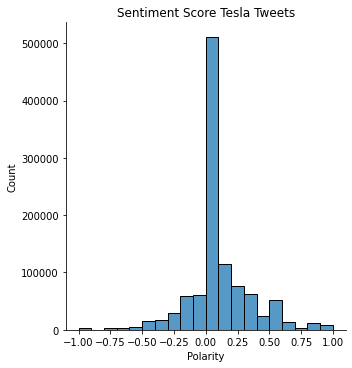

In [49]:
sns.displot(tsla['polarity'], bins=20) \
    .set(title='Sentiment Score Tesla Tweets', xlabel='Polarity')

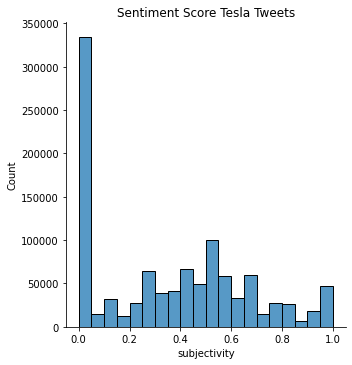

In [50]:
sns.displot(tsla['subjectivity'], bins=20) \
    .set(title='Sentiment Score Tesla Tweets', xlabel='subjectivity')

In [15]:
# remove non-extreme polarity scores
# nevermind
#tsla = tsla[(tsla['polarity']>0.25) | (tsla['polarity']<-0.25)]

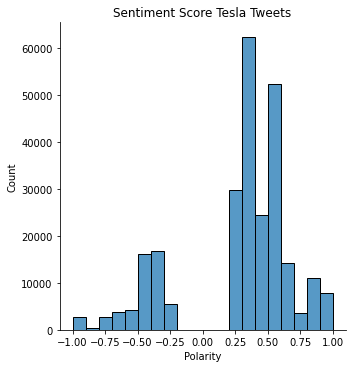

In [16]:
#sns.displot(tsla['polarity'], bins=20) \
#    .set(title='Sentiment Score Tesla Tweets', xlabel='Polarity')

In [51]:
from datetime import datetime
tsla['post_date'] = pd.to_datetime(tsla['post_date'], unit='s').dt.date #change post_date from unix time to datetime

In [52]:
# get the mean polarity of each day
polarity_date = tsla[['post_date', 'polarity', 'subjectivity']].groupby('post_date').mean().reset_index()
polarity_date = polarity_date.rename(columns={'post_date':'Date'})
polarity_date['Date'] = pd.to_datetime(polarity_date['Date']) #convert date to pandas datetime

In [53]:
# get Tesla stocks from yahoo finance
import yfinance as yahooFinance
GetTeslaInformation = yahooFinance.Ticker("TSLA")
tesla_close = GetTeslaInformation.history(period="max")

In [54]:
tesla_close.reset_index(inplace=True) # move date from index to its own column
tesla_close = tesla_close[['Date', 'Open', 'Close']]
tesla_close['Date'] = pd.to_datetime(tesla_close['Date']) # convert date to pandas datetime

In [55]:
# combine polarity_date and tsla_final tables on "Date" column
tsla_final = tesla_close.merge(polarity_date, how="left", on="Date").dropna()
# get training and test sets from data
X = np.array(tsla_final['polarity']).reshape(-1, 1)
y = np.array(tsla_final['Close'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
tsla_final

,Date,Open,Close,polarity
1136,2015-01-02,44.574001,43.862000,0.413871
1137,2015-01-05,42.910000,42.018002,0.427613
1138,2015-01-06,42.012001,42.256001,0.415008
1139,2015-01-07,42.669998,42.189999,0.377024
1140,2015-01-08,42.562000,42.124001,0.303595
...,...,...,...,...
2389,2019-12-24,83.671997,85.050003,0.312909
2390,2019-12-26,85.582001,86.188004,0.308775
2391,2019-12-27,87.000000,86.075996,0.266039
2392,2019-12-30,85.758003,82.940002,0.301495


In [56]:
tsla_final.to_parquet('data/tsla_final2.parquet',
              compression=None)

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
forest.score(X_train, y_train)

0.819311482988343

In [28]:
forest.score(X_test, y_test)

-0.2334878021163509

In [32]:
tsla_final['Date']

<bound method IndexOpsMixin.value_counts of 1136   2015-01-02
1137   2015-01-05
1138   2015-01-06
1139   2015-01-07
1140   2015-01-08
          ...    
2389   2019-12-24
2390   2019-12-26
2391   2019-12-27
2392   2019-12-30
2393   2019-12-31
Name: Date, Length: 1258, dtype: datetime64[ns]>

In [40]:
X

array([[0.41387135],
       [0.42761309],
       [0.41500824],
       ...,
       [0.26603932],
       [0.30149523],
       [0.31912531]])